<h1><center> Statistical Tests for Hypothesis Testing </center></h1>

In [278]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [300]:
def pval(stat):
    print(f'p-value: {stat[1]}')

In [301]:
np.random.seed(5)
# Generate the data
a = np.random.normal(20, 4, 1200)
a = np.append(a, np.random.exponential(3, 200))

b = np.random.normal(15, 12, 1400)

c = np.random.rayleigh(4, 1400)

d = np.random.normal(0, 20, 1000) 
d = np.append(d, np.random.normal(-30, 4,200))
d = np.append(d, np.random.normal(30, 4,200))

data = pd.DataFrame({
    'value': np.concatenate([a, b, c, d]),
    'category': ['A']*len(a) + ['B']*len(b) + ['C']*len(c) + ['D']*len(d)
})
data.sample(7)

,value,category
4969,14.539103,D
4092,5.572167,C
34,19.790767,A
5300,-28.347834,D
946,23.439079,A
4959,33.377219,D
2001,24.324284,B


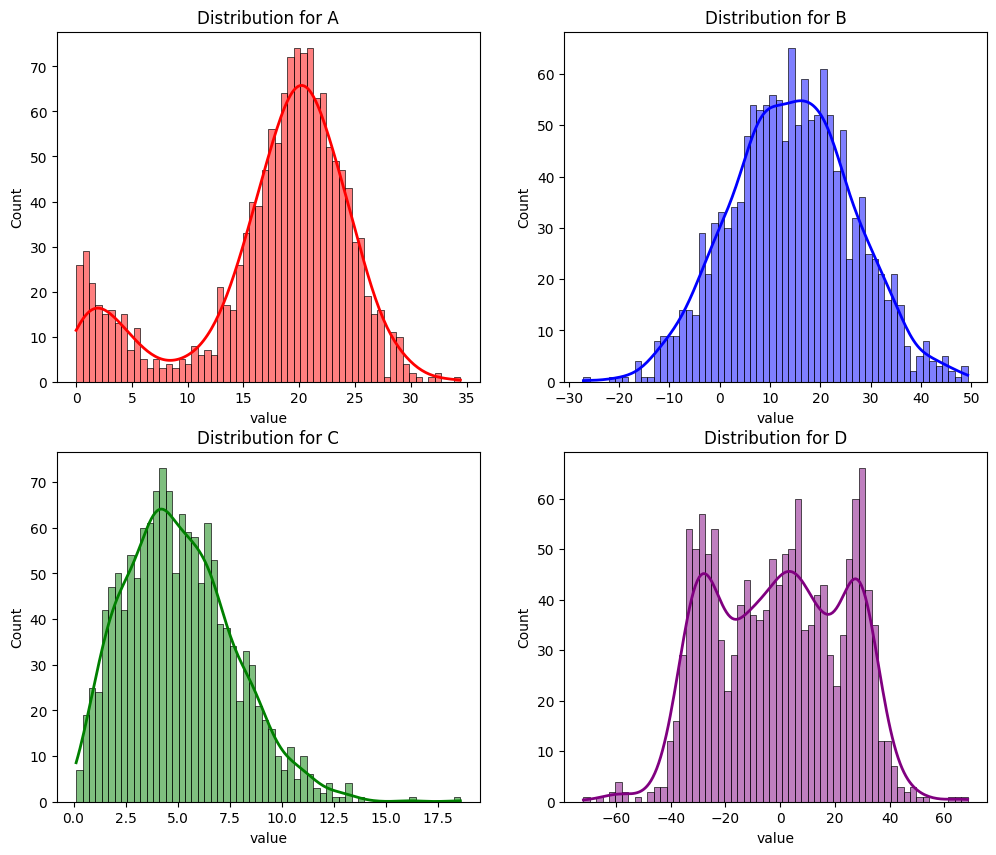

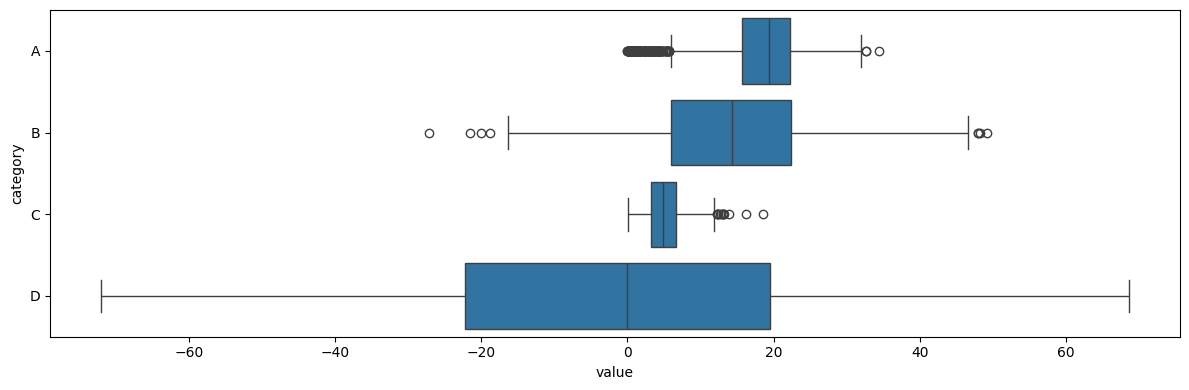

In [302]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
categories = ['A', 'B', 'C', 'D']
colors = ['red', 'blue', 'green', 'purple']

for i, ax in enumerate(axs.flat):
    sns.histplot(data[data['category'] == categories[i]], 
                 x='value', 
                 kde=True, 
                 ax=ax, 
                 color=colors[i],
                 bins=60)
    kde_line = ax.lines[0]
    kde_line.set_color(colors[i])
    kde_line.set_linewidth(2)
    ax.set_title(f'Distribution for {categories[i]}')

plt.figure(figsize=(12, 4))
sns.boxplot(data=data, x='value', y='category')
plt.tight_layout()
plt.show()

### Two group testing

t-test and Welch's tests, both of them assumes normality

In [303]:
# t-test
pval(scipy.stats.ttest_ind(a, b))

p-value: 4.999878366537579e-20


In [304]:
# Welch's test for non-equal variances
pval(scipy.stats.ttest_ind(a, b, equal_var=False))

p-value: 5.837510531211311e-20


Mann-Whitney U test for nonparametric comparison (a.k.a Wilcoxin Rank-Sum Test)

In [305]:
pval(scipy.stats.mannwhitneyu(a, c))

p-value: 1.528258773962874e-288


Bartlett's test tests the null hyptohesis that all input samples are from populations with equal variances. For samples from significantly non-normal populations, Levene's test is more robust

In [308]:
# Bartlett's test
pval(scipy.stats.bartlett(a,c))

p-value: 3.0300025989321614e-264


In [309]:
# Welch's test
pval(scipy.stats.levene(a, c))

p-value: 2.0780406262421786e-86


### Multiple group testing

In [312]:
aa = np.random.normal(20, 6, 120)
bb = np.random.normal(20, 6.2, 120)
cc = np.random.normal(20, 6.4, 120)
dd = np.random.normal(20.1, 6, 120)

#### Anova

In [313]:
pval(scipy.stats.f_oneway(a,b,c,d))

p-value: 0.0


In [314]:
pval(scipy.stats.f_oneway(aa,bb,cc,dd))

p-value: 0.8333727926228458


#### Tukey's Honestly Significant Difference (HSD)
for performing pairwise comparison of means for a set of samples

In [317]:
res = st.tukey_hsd(a, b, c, d)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      3.459     0.000     2.668     4.251
 (0 - 2)     12.658     0.000    11.867    13.450
 (0 - 3)      7.962     0.000     5.970     9.954
 (1 - 0)     -3.459     0.000    -4.251    -2.668
 (1 - 2)      9.199     0.000     8.407     9.991
 (1 - 3)      4.503     0.000     2.510     6.495
 (2 - 0)    -12.658     0.000   -13.450   -11.867
 (2 - 1)     -9.199     0.000    -9.991    -8.407
 (2 - 3)     -4.696     0.000    -6.689    -2.704
 (3 - 0)     -7.962     0.000    -9.954    -5.970
 (3 - 1)     -4.503     0.000    -6.495    -2.510
 (3 - 2)      4.696     0.000     2.704     6.689



In [318]:
res = st.tukey_hsd(aa, bb, cc, dd)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.329     0.975    -2.357     1.699
 (0 - 2)      0.228     0.991    -1.800     2.256
 (0 - 3)     -0.418     0.951    -2.446     1.610
 (1 - 0)      0.329     0.975    -1.699     2.357
 (1 - 2)      0.558     0.894    -1.470     2.586
 (1 - 3)     -0.089     0.999    -2.117     1.939
 (2 - 0)     -0.228     0.991    -2.256     1.800
 (2 - 1)     -0.558     0.894    -2.586     1.470
 (2 - 3)     -0.647     0.844    -2.675     1.381
 (3 - 0)      0.418     0.951    -1.610     2.446
 (3 - 1)      0.089     0.999    -1.939     2.117
 (3 - 2)      0.647     0.844    -1.381     2.675

